#Preprocessing and EDA



###Loading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings; filterwarnings('ignore')

from tqdm import tqdm

In [ ]:
!gdown 1COFT7d1cUq0JqFPcM_sRHHas76hEwbtM

Downloading...
From: https://drive.google.com/uc?id=1COFT7d1cUq0JqFPcM_sRHHas76hEwbtM
To: /content/genetic disorder.zip
100% 1.81M/1.81M [00:00<00:00, 155MB/s]


In [ ]:
!unzip "/content/genetic disorder.zip"

Archive:  /content/genetic disorder.zip
  inflating: test_genetic_disorders.csv  
  inflating: train_genetic_disorders.csv  


In [ ]:
train = pd.read_csv('/content/train_genetic_disorders.csv')
test = pd.read_csv('/content/test_genetic_disorders.csv')

x_train = train
x_test = test

train.head(3)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [ ]:
x_train.shape, x_test.shape

((22083, 45), (9463, 43))

###Data Observation

In [ ]:
x_train.select_dtypes(include= 'object').describe()

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,21011,21011,20724,18317,21011,21011,11771,21011,16151,21011,...,18998,18959,18964,18921,19007,18945,18959,18977,18962,18943
unique,21011,2,2,2,2,2480,6051,15777,27,26,...,2,2,4,4,2,2,2,4,3,9
top,PID0x6418,Yes,No,Yes,No,James,Smith,Sager,Not applicable,-,...,Yes,No,Not applicable,-,Yes,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,12509,12508,10125,11887,394,151,6,8011,10386,...,9625,9500,4807,4797,9555,9605,9509,4855,9686,4893


In [ ]:
train.select_dtypes(include= 'float').describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [ ]:
def null(df):
    null_feats = pd.DataFrame(df.isnull().sum(), index = df.columns, columns = ['nans']).sort_values('nans', ascending = False)
    null_feats['nans %'] = df.isnull().sum() / df.shape[0]
    null_feats['data_type'] = [df[c].dtypes.name for c in null_feats.index]
    return null_feats[null_feats.nans > 0]

null(train)

,nans,nans %,data_type
Family Name,10312,0.466966,object
Mother's age,6790,0.307476,float64
Father's age,6761,0.306163,float64
Institute Name,5932,0.268623,object
Maternal gene,3766,0.170538,object
Symptom 2,3184,0.144183,float64
H/O substance abuse,3162,0.143187,object
Test 5,3144,0.142372,float64
Follow-up,3142,0.142281,object
Disorder Subclass,3140,0.142191,object


most of the features have null values

total number of rows which has only NAN values in x_train: 1072 



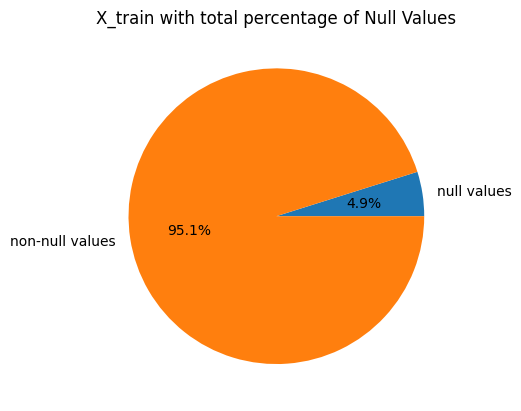

In [ ]:
# Total Null Values in the Train Data

null_rows = x_train.isnull().all(axis=1).sum()
print("total number of rows which has only NAN values in x_train:", null_rows,'\n')

non_null = x_train.shape[0] - null_rows

# define the values
sizes = [null_rows, non_null] # percentages of two values
labels = ['null values', 'non-null values']

# create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# set the title
plt.title('X_train with total percentage of Null Values')

# show the plot
plt.show()

total number of rows which has only NAN values in x_test: 173 



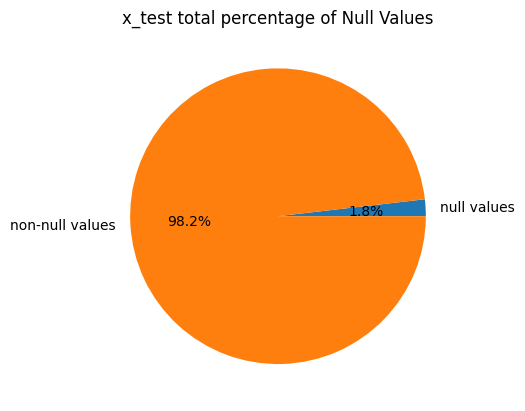

In [ ]:
# Total Null Values in the Train Data

null_rows = x_test.isnull().all(axis=1).sum()
print("total number of rows which has only NAN values in x_test:", null_rows,'\n')

non_null = x_test.shape[0] - null_rows

# define the values
sizes = [null_rows, non_null] # percentages of two values
labels = ['null values', 'non-null values']

# create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# set the title
plt.title('x_test total percentage of Null Values')

# show the plot
plt.show()

In [ ]:
x_train.shape, x_test.shape

((22083, 45), (9463, 43))

##Data Cleaning

In [ ]:
#dropping all the null rows from the Dataset
x_train.dropna(axis = 0, how = 'all', inplace = True)

x_test.dropna(axis = 0, how = 'all', inplace = True)

x_train.shape, x_test.shape

((21011, 45), (9290, 43))

In [ ]:
# removing unwanted columns from the dataset
unwated_columns =['Patient Id','Family Name', 'Institute Name', "Father's name", 'Patient First Name','Place of birth', 'Location of Institute']

x_train = x_train.drop(unwated_columns, axis=1)

x_test= x_test.drop(unwated_columns, axis=1)

x_train.shape, x_test.shape

((21011, 38), (9290, 36))

<Axes: xlabel='Parental consent', ylabel='count'>

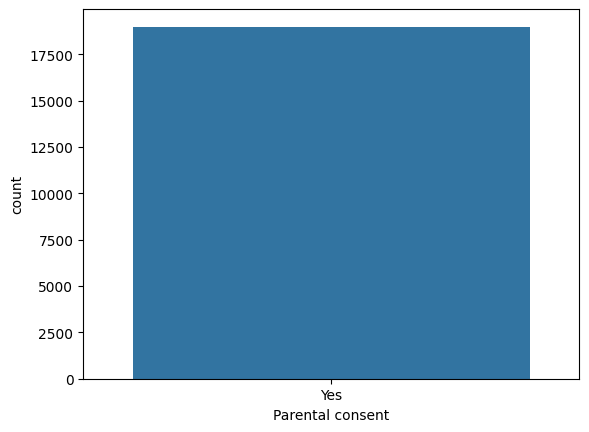

In [ ]:
sns.countplot(x= x_train['Parental consent'])

Parental Consent feature only has 'YES' in it, and without parental consent there can't be any delivery

In [ ]:
# we are dropping parental consent column

x_train = x_train.drop(['Parental consent'], axis=1)

x_test= x_test.drop(['Parental consent'], axis=1)

x_train.shape, x_test.shape

((21011, 37), (9290, 35))

In [ ]:
# checking total NUll values in both target variables
x_train['Genetic Disorder'].isnull().sum(), x_train['Disorder Subclass'].isnull().sum(),

(2049, 2068)

In [ ]:
# some rows in the target columns are empty or null
# we will remove completes rows in which target row is empty
# because we can't impute dependent variable which can lead to wrong prediction while training model
x_train.dropna(subset=['Genetic Disorder'], how='all', inplace=True)
x_train.dropna(subset=['Disorder Subclass'], how='all', inplace=True)

x_train.shape[0]

17160

In [ ]:
target_1 = x_train['Genetic Disorder'].reset_index(drop=True)
target_2 = x_train['Disorder Subclass'].reset_index(drop=True)

x_train = x_train.drop(columns= ['Genetic Disorder', 'Disorder Subclass'])

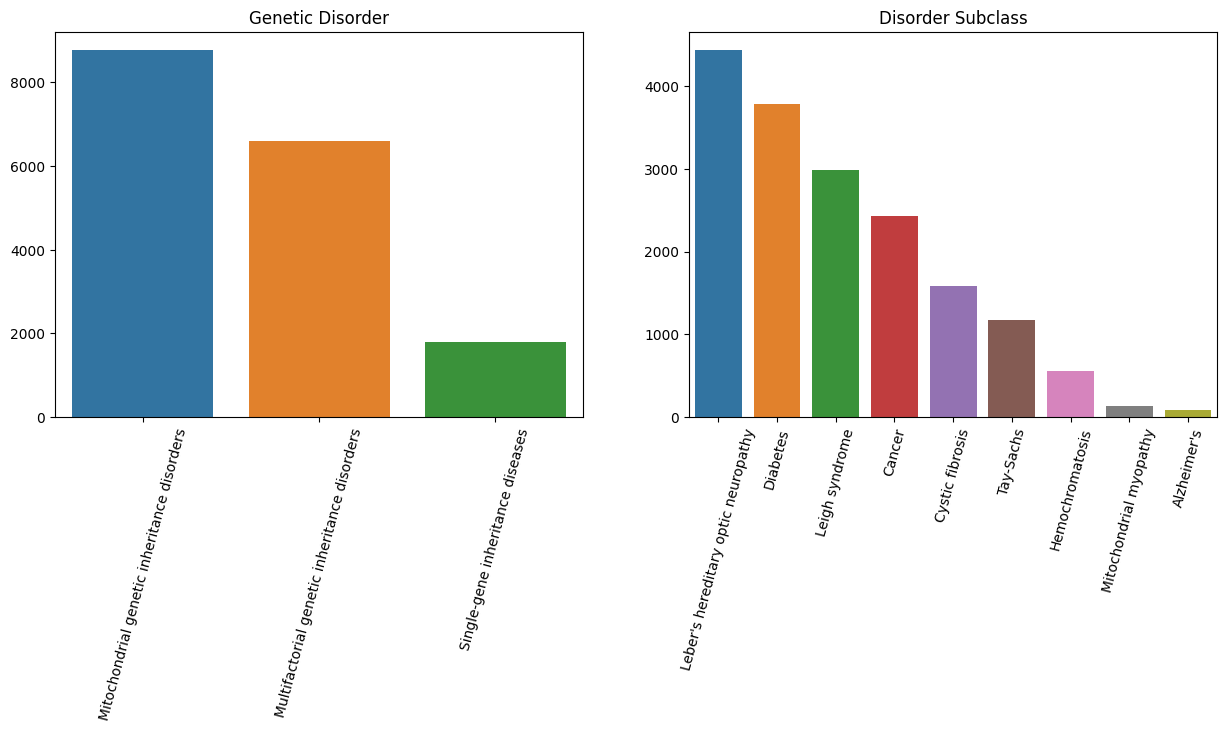

In [ ]:
fig, axes= plt.subplots(nrows =1, ncols=2, figsize = (15, 5))

for i, ax in enumerate(axes.flatten()):
    values = globals()[f'target_{i+1}'].value_counts()
    sns.barplot(x= values.index, y= values.values, ax = ax)
    ax.set_title(values.name)
    ax.set_xticklabels(rotation = 75, labels = globals()[f'target_{i+1}'].unique())


In [ ]:
# here we are checking unique values in each Test columns
tests = ['Test 1','Test 2','Test 3','Test 4','Test 5']

for i in tests:
    print(10*'*',i,10*'*')
    print(x_train[i].unique())

********** Test 1 **********
[ 0. nan]
********** Test 2 **********
[nan  0.]
********** Test 3 **********
[nan  0.]
********** Test 4 **********
[ 1. nan]
********** Test 5 **********
[ 0. nan]


<h2>Hence we can clearly observe that the Test features have no useful information in it, mostly are the 0 and NANS, so we will drops all the 5 Test columns

In [ ]:
# dropping Test columns
x_train = x_train.drop(tests, axis= 1)

x_test = x_test.drop(tests, axis= 1)

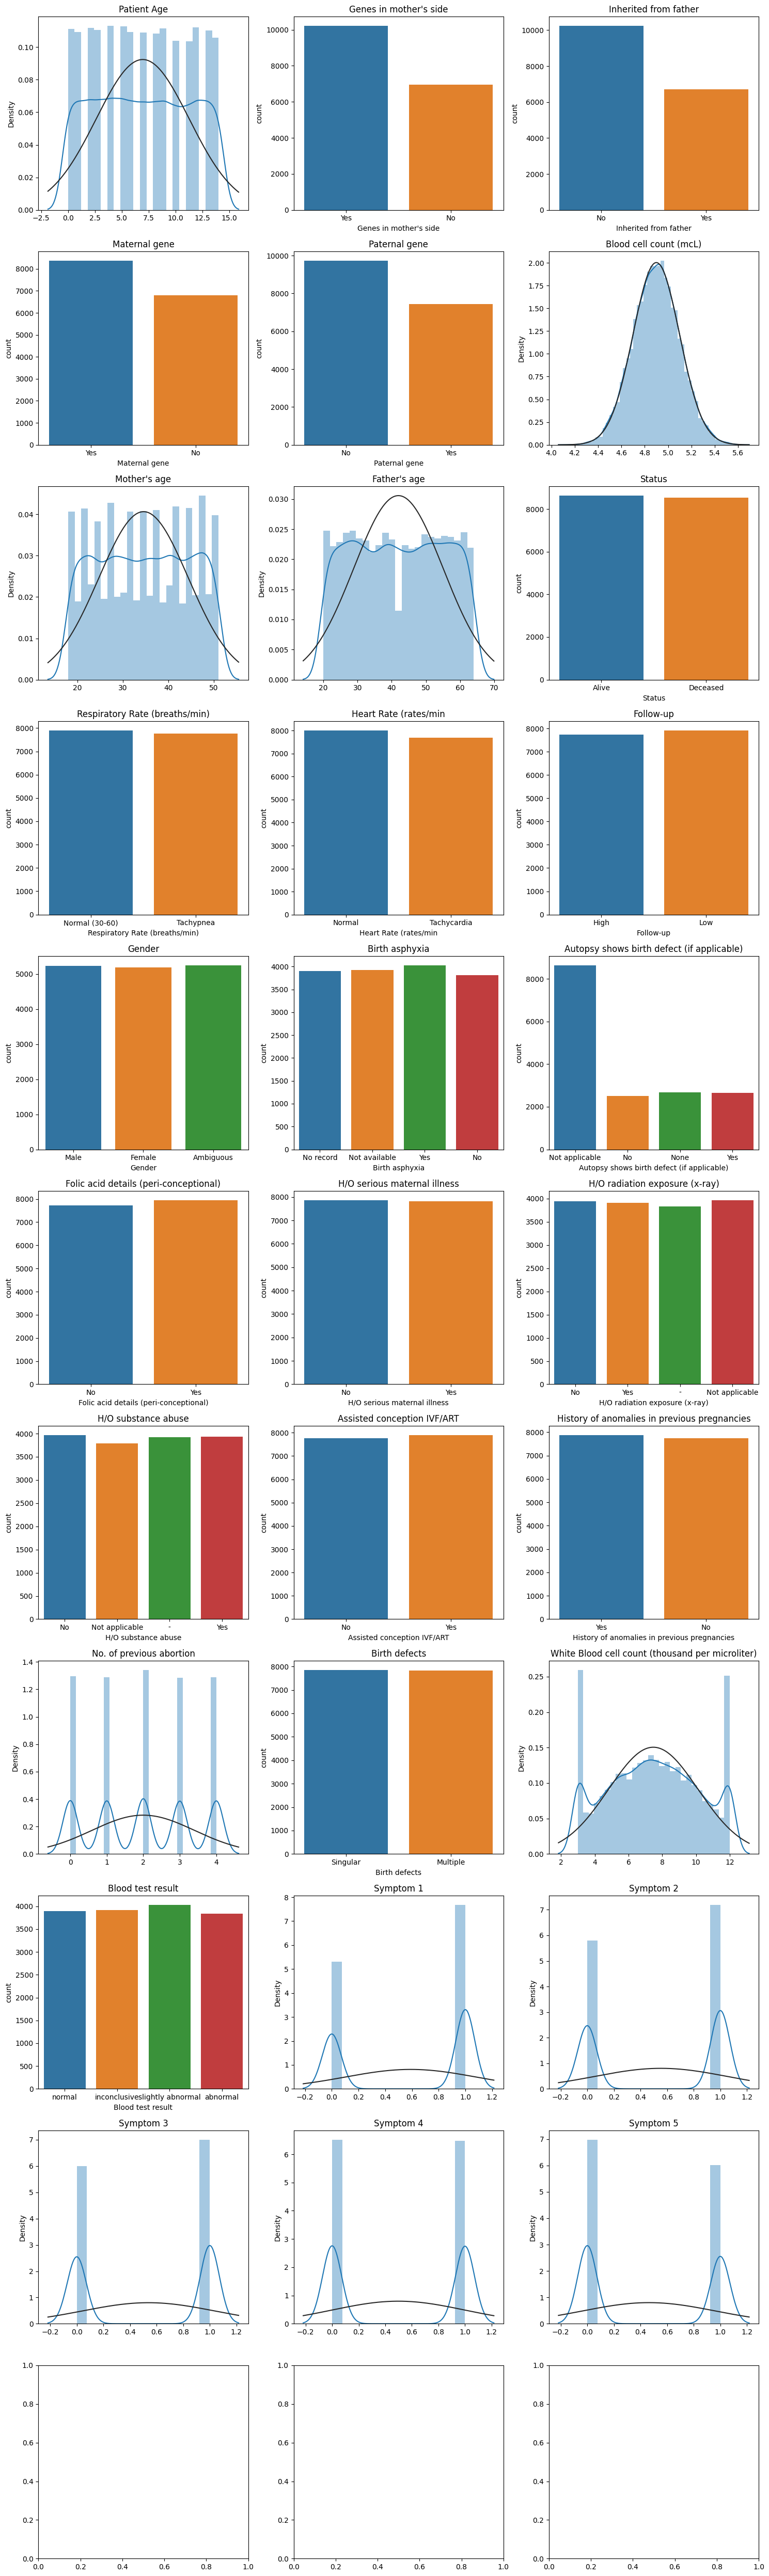

In [ ]:
from scipy.stats import norm

# Create a figure and axes object
fig, axes = plt.subplots(nrows=11, ncols=3, figsize = (15, 50))

# Loop over the columns of the data frame
for i, column in enumerate(x_train.columns):
    # Plot a histogram of each column on a separate subplot
    if x_train[column].dtype == 'object':
        sns.countplot(x=x_train[column], ax=axes[i // 3, i % 3])
    else:
        sns.distplot(x=x_train[column], fit = norm, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)

plt.tight_layout()

# Show the figure
plt.show()


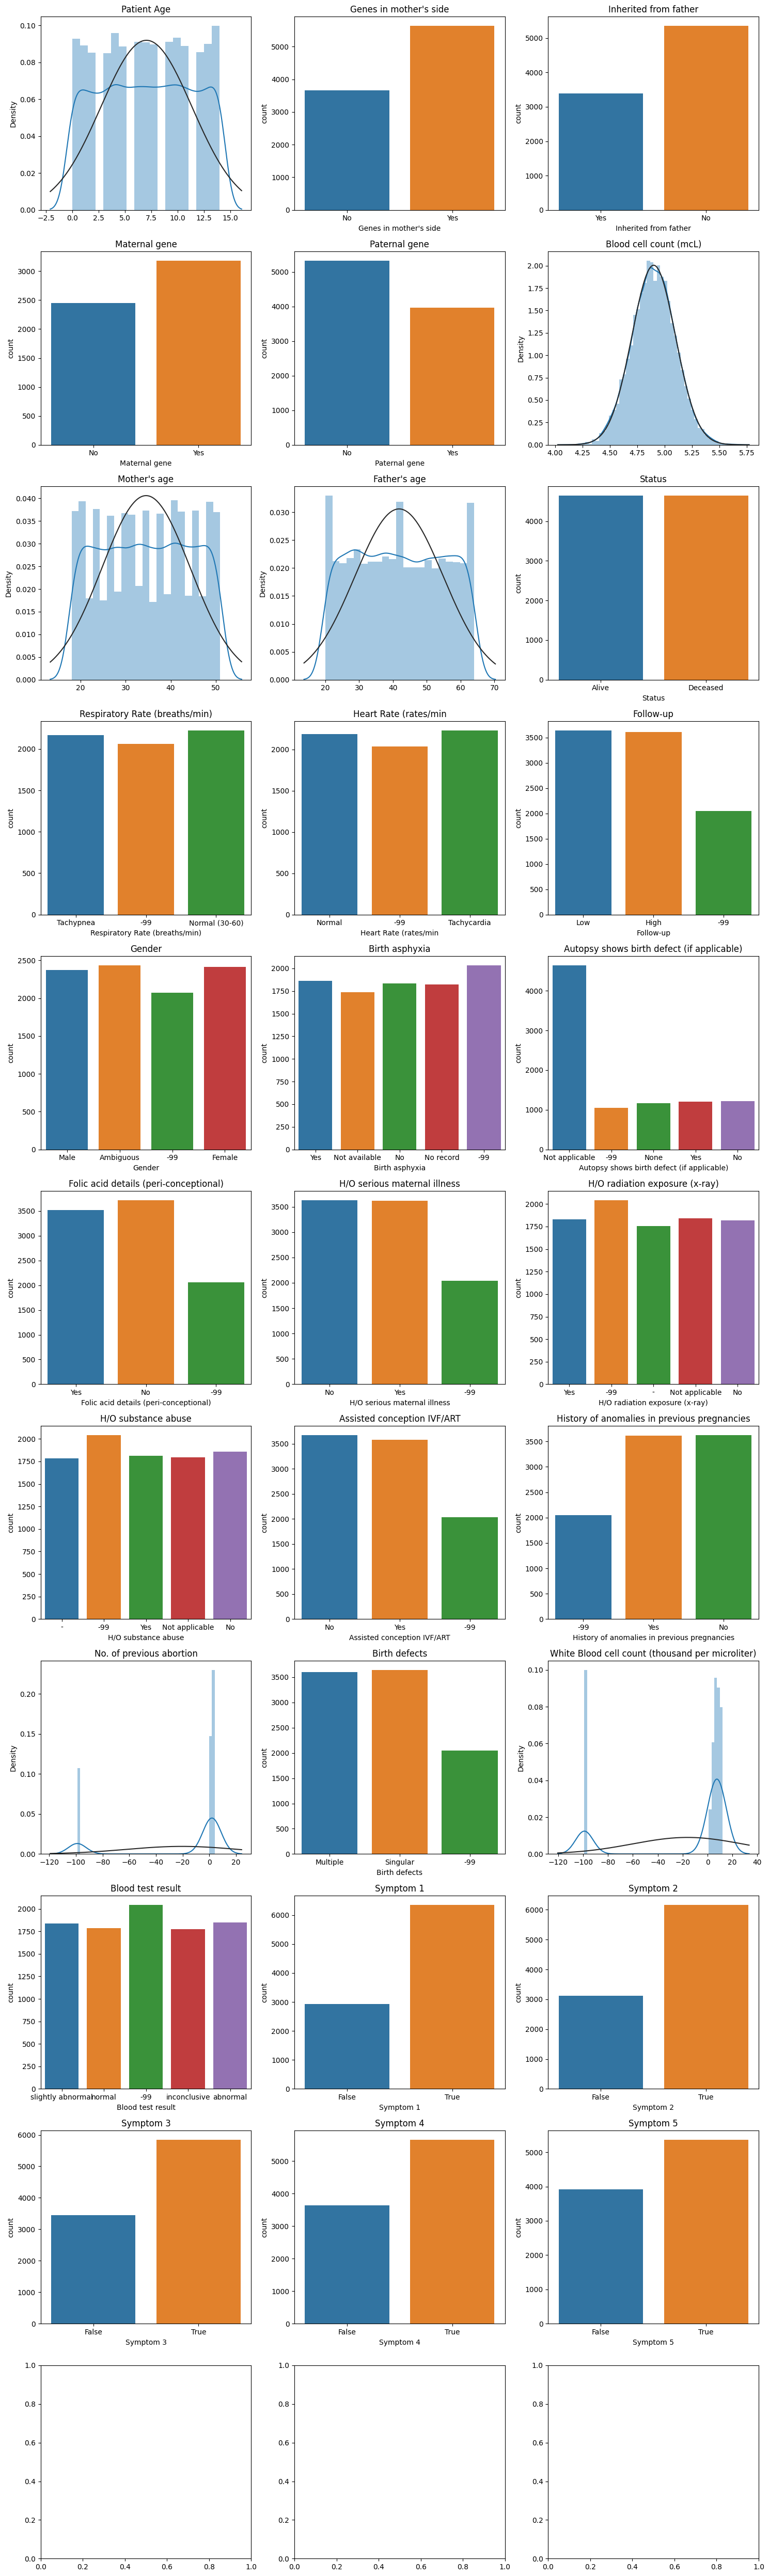

In [ ]:
# Create a figure and axes object
fig, axes = plt.subplots(nrows=11, ncols=3, figsize = (15, 50))

# Loop over the columns of the data frame
for i, column in enumerate(x_test.columns):
    # Plot a histogram of each column on a separate subplot
    if x_test[column].dtype == 'object':
        sns.countplot(x=x_test[column], ax=axes[i // 3, i % 3])
    else:
        sns.distplot(x=x_test[column], fit = norm, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)

plt.tight_layout()
# Show the figure
plt.show()


<h2> Here we can observe that in most of the features there are lots of outliers in the test data set which is '-99'

In [ ]:
for i in x_train.columns:
    if x_train[i].nunique() <= 50:
      print('\n', 10*'*',i,10*'*')
      print(x_train[i].unique())


 ********** Patient Age **********
[ 2.  6. 12. 11. 14.  3.  4.  7.  1.  0. nan 10.  5.  8.  9. 13.]

 ********** Genes in mother's side **********
['Yes' 'No']

 ********** Inherited from father **********
['No' 'Yes' nan]

 ********** Maternal gene **********
['Yes' 'No' nan]

 ********** Paternal gene **********
['No' 'Yes']

 ********** Mother's age **********
[nan 41. 21. 32. 40. 45. 44. 50. 30. 24. 36. 51. 23. 49. 46. 18. 38. 37.
 42. 48. 28. 25. 19. 47. 34. 35. 22. 33. 20. 29. 26. 31. 27. 43. 39.]

 ********** Father's age **********
[nan 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 32. 41. 52. 28. 31.
 61. 35. 49. 50. 23. 29. 64. 39. 34. 51. 25. 43. 60. 53. 58. 26. 27. 59.
 38. 47. 54. 21. 37. 36. 46. 40. 45. 33.]

 ********** Status **********
['Alive' 'Deceased']

 ********** Respiratory Rate (breaths/min) **********
['Normal (30-60)' 'Tachypnea' nan]

 ********** Heart Rate (rates/min **********
['Normal' 'Tachycardia' nan]

 ********** Follow-up **********
['High' 'Low'

In [ ]:
for i in x_test.columns:
    if x_test[i].nunique() <= 50:
      print('\n', 10*'*',i,10*'*')
      print(x_test[i].unique())


 ********** Patient Age **********
[ 6. 10.  5. 13.  9.  4. 12.  3.  1.  0. 14.  8.  2. 11.  7.]

 ********** Genes in mother's side **********
['No' 'Yes']

 ********** Inherited from father **********
['Yes' 'No' nan]

 ********** Maternal gene **********
['No' nan 'Yes']

 ********** Paternal gene **********
['No' 'Yes']

 ********** Mother's age **********
[38. 33. 48. 25. 41. 27. 19. 37. 28. 39. 49. 40. 22. 21. 46. 24. 30. 47.
 20. 42. 35. 36. 51. 50. 45. 34. 44. 43. 32. 26. 31. 18. 23. 29.]

 ********** Father's age **********
[61. 53. 60. 55. 38. 25. 22. 24. 51. 56. 23. 48. 33. 37. 45. 62. 64. 36.
 58. 43. 27. 46. 50. 30. 40. 26. 47. 44. 49. 63. 39. 21. 41. 29. 20. 54.
 31. 52. 59. 57. 42. 35. 28. 34. 32.]

 ********** Status **********
['Alive' 'Deceased']

 ********** Respiratory Rate (breaths/min) **********
['Tachypnea' nan '-99' 'Normal (30-60)']

 ********** Heart Rate (rates/min **********
['Normal' '-99' nan 'Tachycardia']

 ********** Follow-up **********
['Low' 'High'

<Axes: xlabel='No. of previous abortion', ylabel='count'>

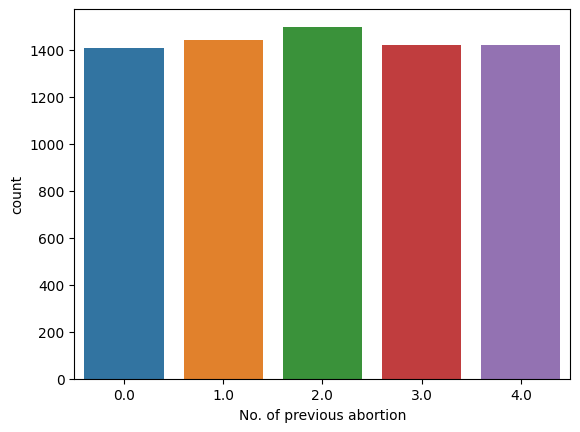

In [ ]:
sns.countplot(x= x_train['No. of previous abortion'][x_train['Birth defects'] == 'Multiple'])

<h2> there some features in the test data set which has both Null values and -99 as an outlier

In [ ]:
x_train['Birth asphyxia'].value_counts()

Yes              4026
Not available    3927
No record        3899
No               3812
Name: Birth asphyxia, dtype: int64

In [ ]:
# there is no relevance of having 'No record' so replacing it with 'Not available'
x_train['Birth asphyxia'] = x_train['Birth asphyxia'].replace({'No record' : 'Not available'})
x_test['Birth asphyxia'] = x_test['Birth asphyxia'].replace({'No record' : 'Not available'})

In [ ]:
x_train["H/O substance abuse"].value_counts()

No                3968
Yes               3930
-                 3927
Not applicable    3784
Name: H/O substance abuse, dtype: int64

In [ ]:
x_train["H/O radiation exposure (x-ray)"].value_counts()

Not applicable    3967
No                3946
Yes               3915
-                 3831
Name: H/O radiation exposure (x-ray), dtype: int64

In [ ]:
# there is no relevance of having '-' so replacing it with 'Not applicable'
x_train[["H/O substance abuse", "H/O radiation exposure (x-ray)"]] = x_train[["H/O substance abuse", "H/O radiation exposure (x-ray)"]].replace({'-':'Not applicable'})
x_test[["H/O substance abuse", "H/O radiation exposure (x-ray)"]] = x_test[["H/O substance abuse", "H/O radiation exposure (x-ray)"]].replace({'-':'Not applicable'})

In [ ]:
x_train["Autopsy shows birth defect (if applicable)"].value_counts()

Not applicable    8631
None              2673
Yes               2640
No                2504
Name: Autopsy shows birth defect (if applicable), dtype: int64

In [ ]:
# there is no relevance of having 'None' so replacing it with 'No'
x_train["Autopsy shows birth defect (if applicable)"] = x_train["Autopsy shows birth defect (if applicable)"].replace({'None': 'No'})
x_test["Autopsy shows birth defect (if applicable)"] = x_test["Autopsy shows birth defect (if applicable)"].replace({'None': 'No'})

In [ ]:
# here we are finding those test columns which only has -99 in it not null values
# because null values in train data is -99 in test data

column_99 = []
# iterating over every column in x_train
for i in x_train.columns:
    # checking if there is any null values in x_train and simultaneously -99 value in x_test
    # it won't take those columns which contains both -99 and null in x_train columns
    if x_train[i].isnull().any() and (any(x_test[i] == '-99') or any(x_test[i] == -99 )) and not x_test[i].isnull().any():
         column_99.append(i)
column_99

['Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'No. of previous abortion',
 'Birth defects',
 'White Blood cell count (thousand per microliter)',
 'Blood test result']

In [ ]:
# replacing -99 with np.nan
# later we will replace null values with median and mode respectively

x_test[column_99] = x_test[column_99].replace({'-99' : np.nan})
x_test[column_99] = x_test[column_99].replace({-99 : np.nan})

In [ ]:
# checking if there is any -99 value left in the x_train
count = 0
for i in x_test.columns:
    if x_train[i].isnull().any() and (any(x_test[i] == '-99') or any(x_test[i] == -99 )) and not x_test[i].isnull().any():
        count += 1
count

0

In [ ]:
# here we are finding features with null and -99 in test data set

column_99= []
# iterating over each x_test columns
for i in x_test.columns:
    # it will check if there are both null values and -99 values in a same column simultaneously
    if x_test[i].isnull().any() and any(x_test[i] == '-99') or any(x_test[i] == -99):
        column_99.append(i)

# print those columns with its unique consists
for i in column_99:

      print('\n', 10*'*',i,10*'*')
      print(x_test[i].unique())


 ********** Respiratory Rate (breaths/min) **********
['Tachypnea' nan '-99' 'Normal (30-60)']

 ********** Heart Rate (rates/min **********
['Normal' '-99' nan 'Tachycardia']


In [ ]:
x_test['Respiratory Rate (breaths/min)'].value_counts()

Normal (30-60)    2224
Tachypnea         2165
-99               2061
Name: Respiratory Rate (breaths/min), dtype: int64

In [ ]:
x_test['Respiratory Rate (breaths/min)'].isnull().sum()

2840

In [ ]:
x_test['Heart Rate (rates/min'].value_counts()

Tachycardia    2230
Normal         2184
-99            2035
Name: Heart Rate (rates/min, dtype: int64

In [ ]:
x_test['Heart Rate (rates/min'].isnull().sum()

2841

In [ ]:
# there are same amount of '-99' and NUll values in the both features
# and both the features has 2 unique values
# we are replacing '-99' elements with 'Tachypnea' and NUll values with 'Normal (30-60)'
# reason is to make balance between both unique values
x_test['Respiratory Rate (breaths/min)'] = x_test['Respiratory Rate (breaths/min)'].replace({'-99': 'Tachypnea',
                                                                                             np.nan: 'Normal (30-60)'})

# we are replacing '-99' elements with 'Tachycardia' and NUll values with 'Normal'
x_test['Heart Rate (rates/min'] = x_test['Heart Rate (rates/min'].replace({'-99': 'Tachycardia',
                                                                           np.nan: 'Normal'})

In [ ]:
# if any column left with both Null and -99 value simultaneously

hu = [{i: len(x_test[x_test[i]== '-99'])} for i in x_test.select_dtypes(include='object').columns if len(x_test[x_test[i]== '-99']) != 0]
hu

[]

Text(0.5, 1.0, "Patient's Age for 18 year old mother")

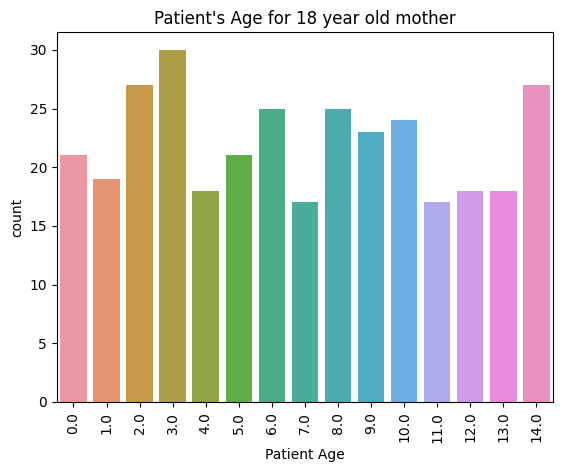

In [ ]:
plt.xticks(rotation = 90)
sns.countplot(x= x_train['Patient Age'][x_train["Mother's age"] == 18])
plt.title("Patient's Age for 18 year old mother")

<h3>Surprisingly! here Patient's Age is 14 years while age of mother is only 18

Text(0.5, 1.0, "Father's age for 18 year old mother")

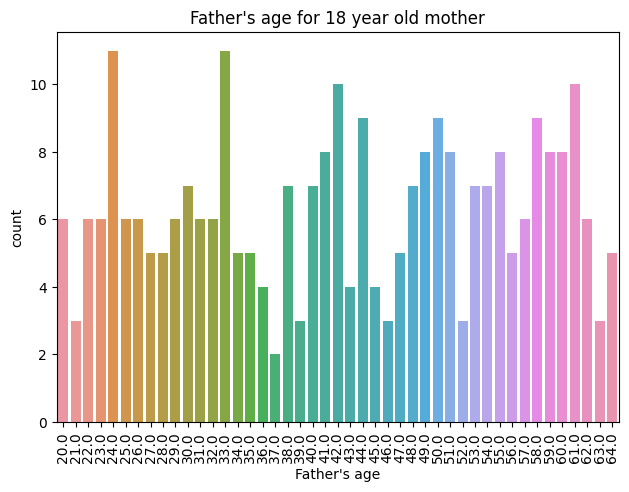

In [ ]:
plt.xticks(rotation = 90)

sns.countplot(x= x_train["Father's age"][x_train["Mother's age"] == 18])
plt.tight_layout()
plt.title("Father's age for 18 year old mother")

Text(0.5, 1.0, 'Previous abortion by 18 years old mother')

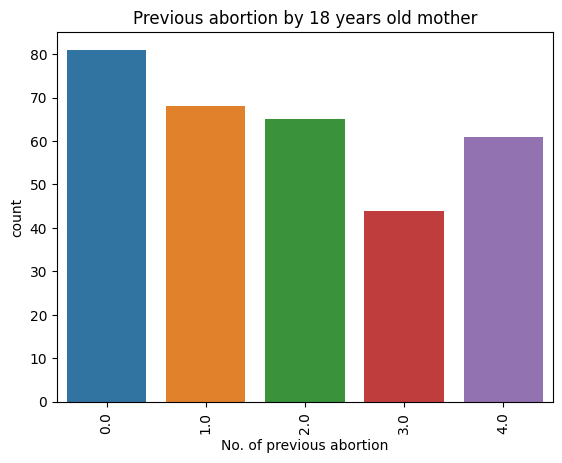

In [ ]:
plt.xticks(rotation = 90)
sns.countplot(x= x_train['No. of previous abortion'][x_train["Mother's age"] == 18])
plt.title("Previous abortion by 18 years old mother")

how can there be 4 previous abortion while mother's age is only 18 years old

In [ ]:
x_train.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')

### Data Upsampling

In [ ]:
# Missing value imputation
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

In [ ]:
for i in x_train.columns:
    if (x_train[i].dtype.name!='object')&(x_train[i].nunique()<=3):
        imp_mode_num.fit(np.array(x_train[i]).reshape(-1,1))
        x_train[i]=imp_mode_num.transform(np.array(x_train[i]).reshape(-1,1))
        x_test[i]=imp_mode_num.transform(np.array(x_test[i]).reshape(-1,1))
    elif (x_train[i].dtype.name!='object')&(x_train[i].nunique()>3):
        imp_median.fit(np.array(x_train[i]).reshape(-1,1))
        x_train[i]=imp_median.transform(np.array(x_train[i]).reshape(-1,1))
        x_test[i]=imp_median.transform(np.array(x_test[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(x_train[i]).reshape(-1,1))
        x_train[i]=imp_mode.transform(np.array(x_train[i]).reshape(-1,1))
        x_test[i]=imp_mode.transform(np.array(x_test[i]).reshape(-1,1))

In [ ]:
x_train.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ray)                      0
H/O substance abuse         